# Run FindAllMarkers on Set 1

In [1]:
library(Seurat)
library(ggplot2)
library(magrittr)
library(data.table)
library(Matrix)
library(dplyr)
library(tibble)
library(MAST)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count



Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
 

In [2]:
seu_HQC <- readRDS(file = "../../data/seurat_object/Set1/seu_HQC_subclusterd2_Set1.obj")
seu_HQC

An object of class Seurat 
28877 features across 1018 samples within 2 assays 
Active assay: SCT (11281 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [3]:
annot_df <- read.csv('./annot_df.csv')
annot_df

cluster_id,cluster_name
<int>,<chr>
1,endoderm_antMG_and_ectoderm_head_croc
2,ectoderm_head_oc_grn
3,ectoderm_head_oc_CenG1A
4,ectoderm_head_oc_Pvf3
5,ectoderm_head_kn
6,ectoderm_medial_DE_PS1_and_PS2
7,ectoderm_intermediate_DE_PS1_and_PS2
8,ectoderm_lateral_DE_PS1_and_PS2
9,ectoderm_lateral_NE_PS1_and_PS2


In [4]:
levels <- read.table(file="./manual_ID_levels_color_Set1.txt", comment.char = '')
colors <- levels[,2]
levels <- levels[,1]
head(levels)
length(levels)
head(colors)

[1] "endoderm_antMG_and_ectoderm_head_croc"
[2] "ectoderm_head_oc_grn"                 
[3] "ectoderm_head_oc_CenG1A"              
[4] "ectoderm_head_oc_Pvf3"                
[5] "ectoderm_head_kn"                     
[6] "ectoderm_medial_DE_PS1_and_PS2"

[1] 32

[1] "lightsteelblue1" "lightsteelblue2" "lightskyblue3"   "skyblue1"       
[5] "skyblue3"        "darkolivegreen1"

In [5]:
Idents(seu_HQC) <- 'manual_ID'
levels(seu_HQC) <- levels
all.markers <- FindAllMarkers(seu_HQC, method = 'MAST')
head(all.markers)

Calculating cluster endoderm_antMG_and_ectoderm_head_croc

Calculating cluster ectoderm_head_oc_grn

Calculating cluster ectoderm_head_oc_CenG1A

Calculating cluster ectoderm_head_oc_Pvf3

Calculating cluster ectoderm_head_kn

Calculating cluster ectoderm_medial_DE_PS1_and_PS2

Calculating cluster ectoderm_intermediate_DE_PS1_and_PS2

Calculating cluster ectoderm_lateral_DE_PS1_and_PS2

Calculating cluster ectoderm_lateral_NE_PS1_and_PS2

Calculating cluster ectoderm_intermediate_NE_PS1_and_PS2

Calculating cluster ectoderm_medial_NE_PS1_and_PS2

Calculating cluster ectoderm_medial_DE_abdominal

Calculating cluster ectoderm_intermediate_DE_abdominal

Calculating cluster ectoderm_lateral_DE_abdominal

Calculating cluster ectoderm_lateral_NE_abdominal

Calculating cluster ectoderm_intermediate_NE_abdominal

Calculating cluster ectoderm_medial_NE_abdominal

Calculating cluster midline_cells

Calculating cluster ectoderm_PS14

Calculating cluster ectoderm_PS14/hindgut

Calculating cluster 

,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
Ldh,8.872065e-55,2.0291865,0.810,0.039,1.000858e-50,endoderm_antMG_and_ectoderm_head_croc,Ldh
CG13251,7.903827e-40,1.6351618,0.619,0.031,8.916307e-36,endoderm_antMG_and_ectoderm_head_croc,CG13251
Adgf-A,1.972633e-31,1.8028443,0.905,0.103,2.225327e-27,endoderm_antMG_and_ectoderm_head_croc,Adgf-A
croc,6.280872e-30,2.7184939,0.571,0.039,7.085452e-26,endoderm_antMG_and_ectoderm_head_croc,croc
lncRNA:CR44526,6.764216e-29,0.4429985,0.190,0.002,7.630712e-25,endoderm_antMG_and_ectoderm_head_croc,lncRNA:CR44526
CG14204,1.638833e-28,0.8848040,0.667,0.054,1.848767e-24,endoderm_antMG_and_ectoderm_head_croc,CG14204


In [6]:
all.markers.top10 <- all.markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)
nrow(all.markers.top10)

[1] 320

Warning message in DoHeatmap(seu_HQC, features = c(all.markers.top10$gene), group.colors = colors, :
“The following features were omitted as they were not found in the scale.data slot for the SCT assay: Myo10A, tsg, Kank, CG1602, CG14104, CG32037, CG15646, insc”


NULL

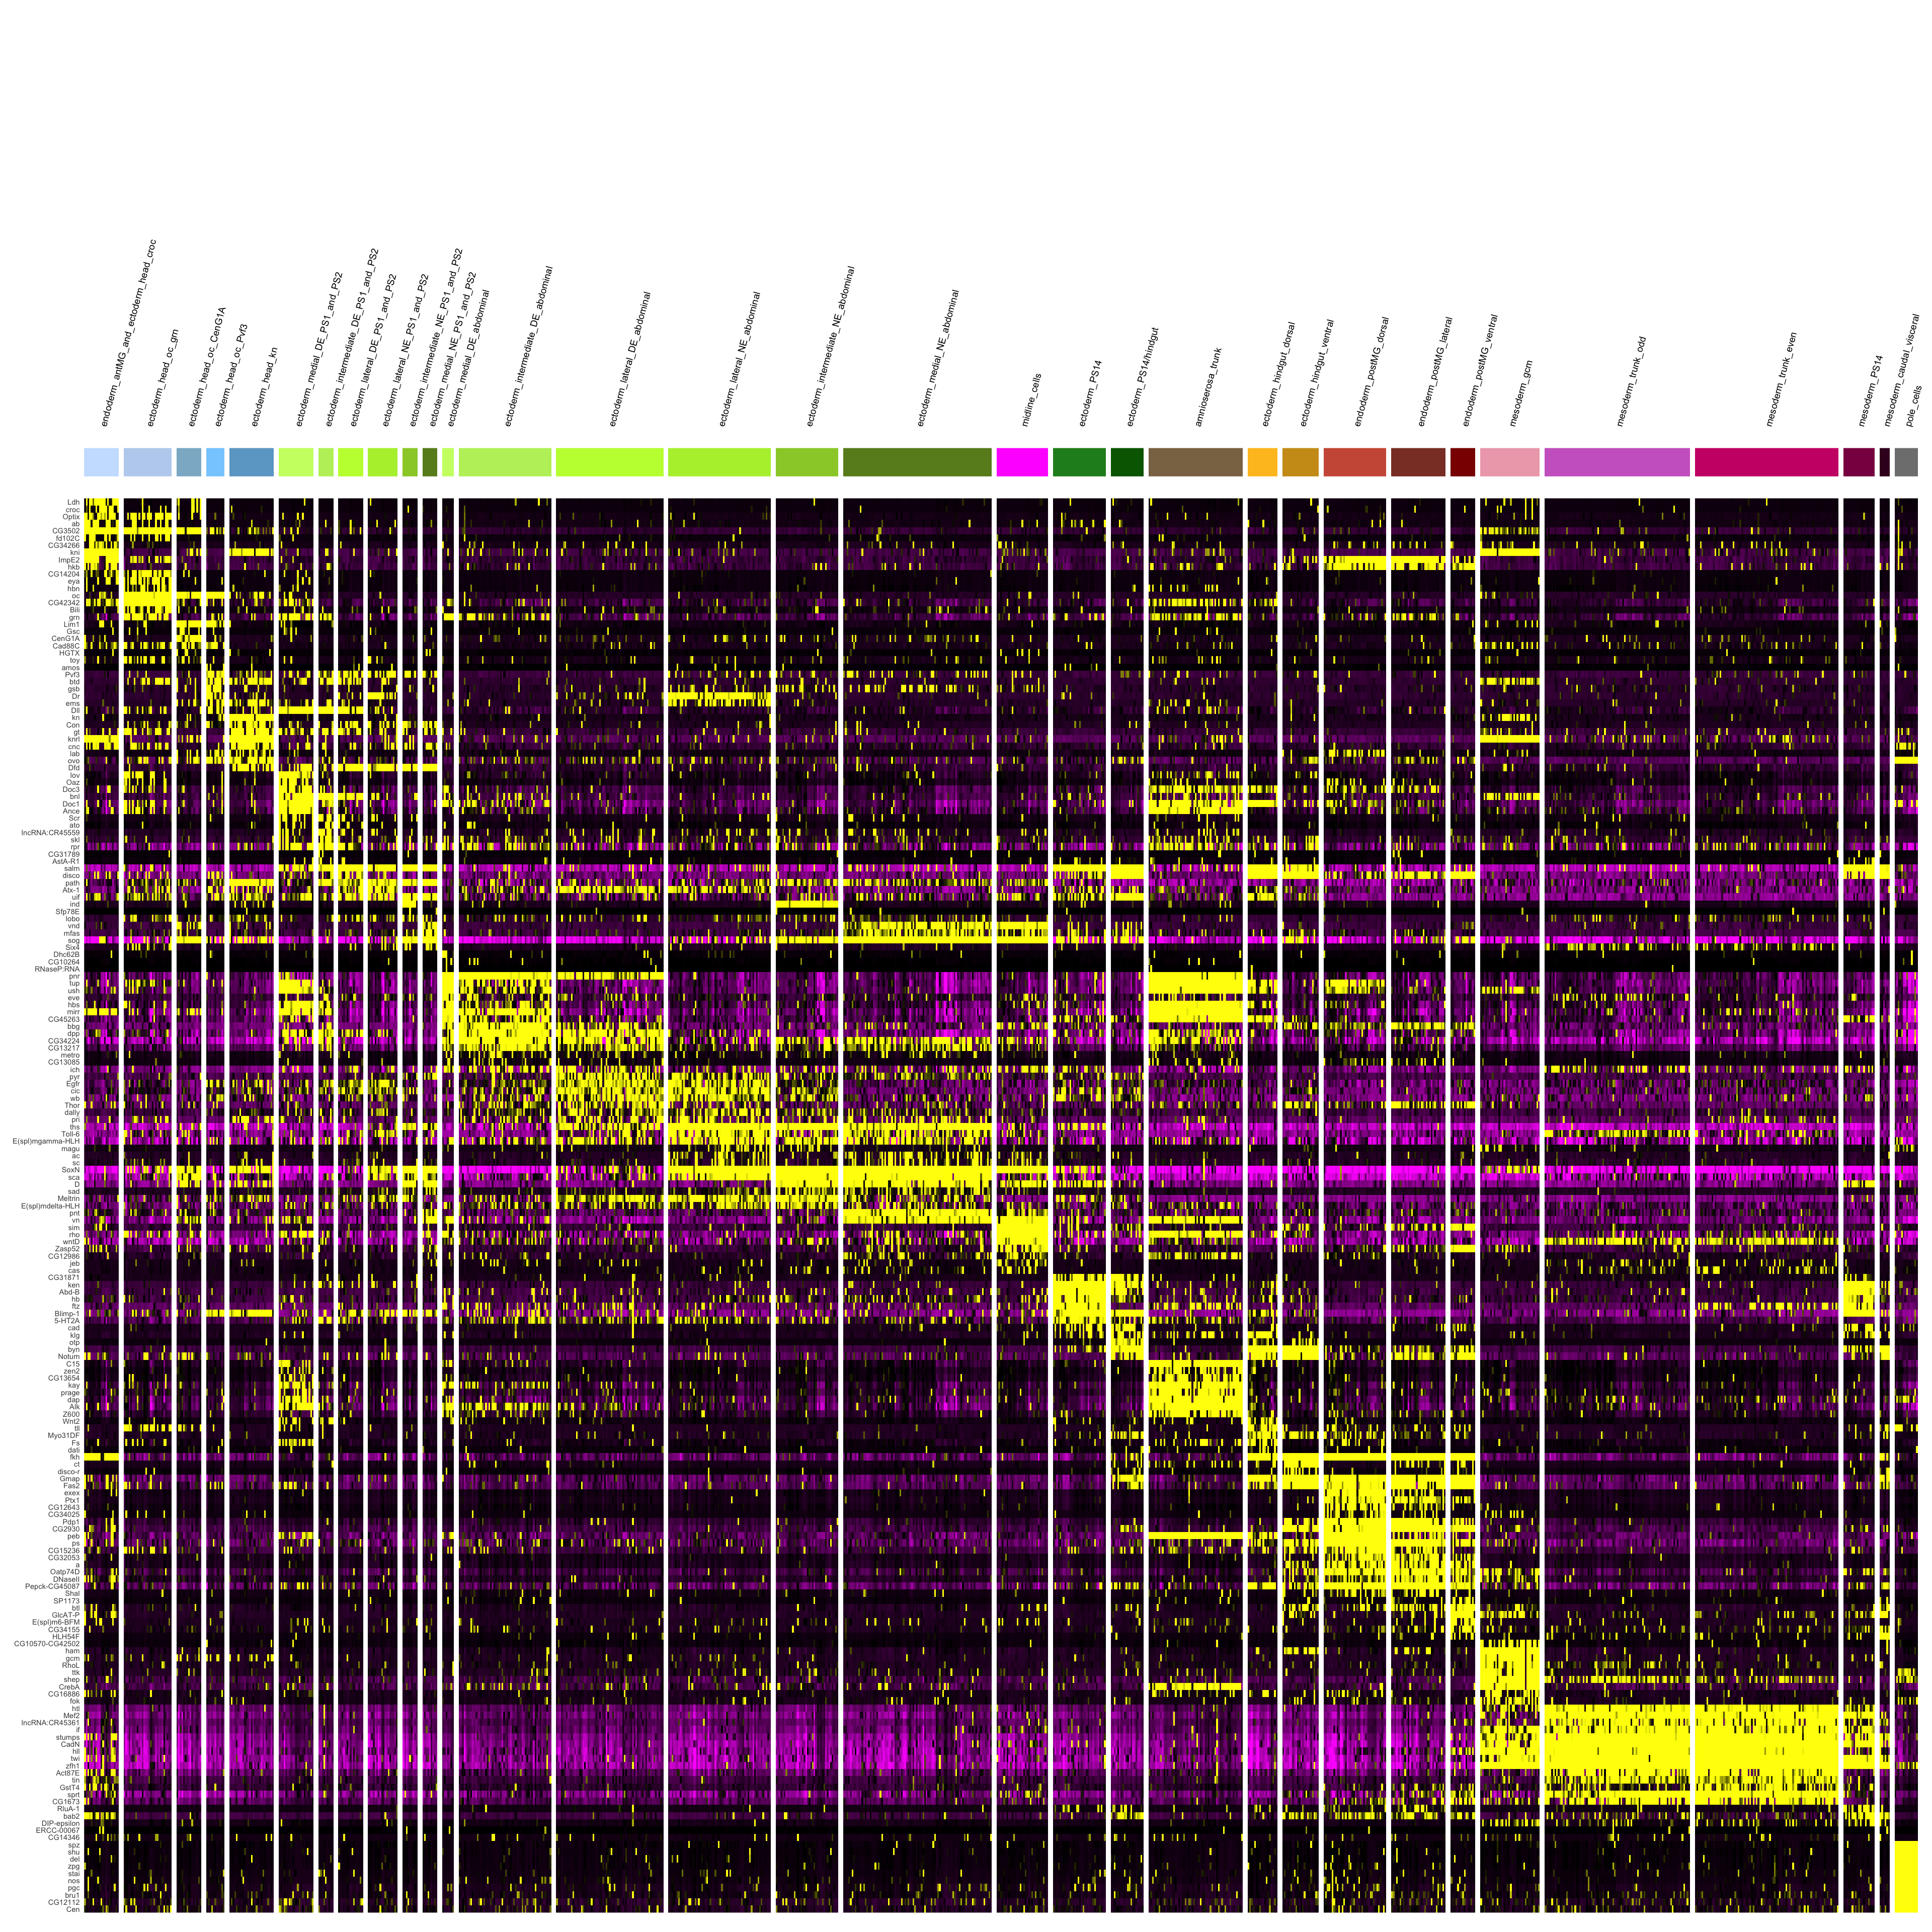

In [7]:
options(repr.plot.width=32, repr.plot.height=32)
DoHeatmap(seu_HQC, features = c(all.markers.top10$gene), group.colors =  colors,
          angle = 75, size=4)  + NoLegend() 
ggsave(file = "./figures/09_FindAllMarkers_Set1/All_cells_heatmap_manual_ID_Set1.eps", width = 32, height = 32) +
theme(plot.margin = unit(c(1,1,1,1), "cm"))

Warning message in DoHeatmap(seu_HQC, features = c(all.markers.top10$gene), group.colors = colors, :
“The following features were omitted as they were not found in the scale.data slot for the SCT assay: Myo10A, tsg, Kank, CG1602, CG14104, CG32037, CG15646, insc”


NULL

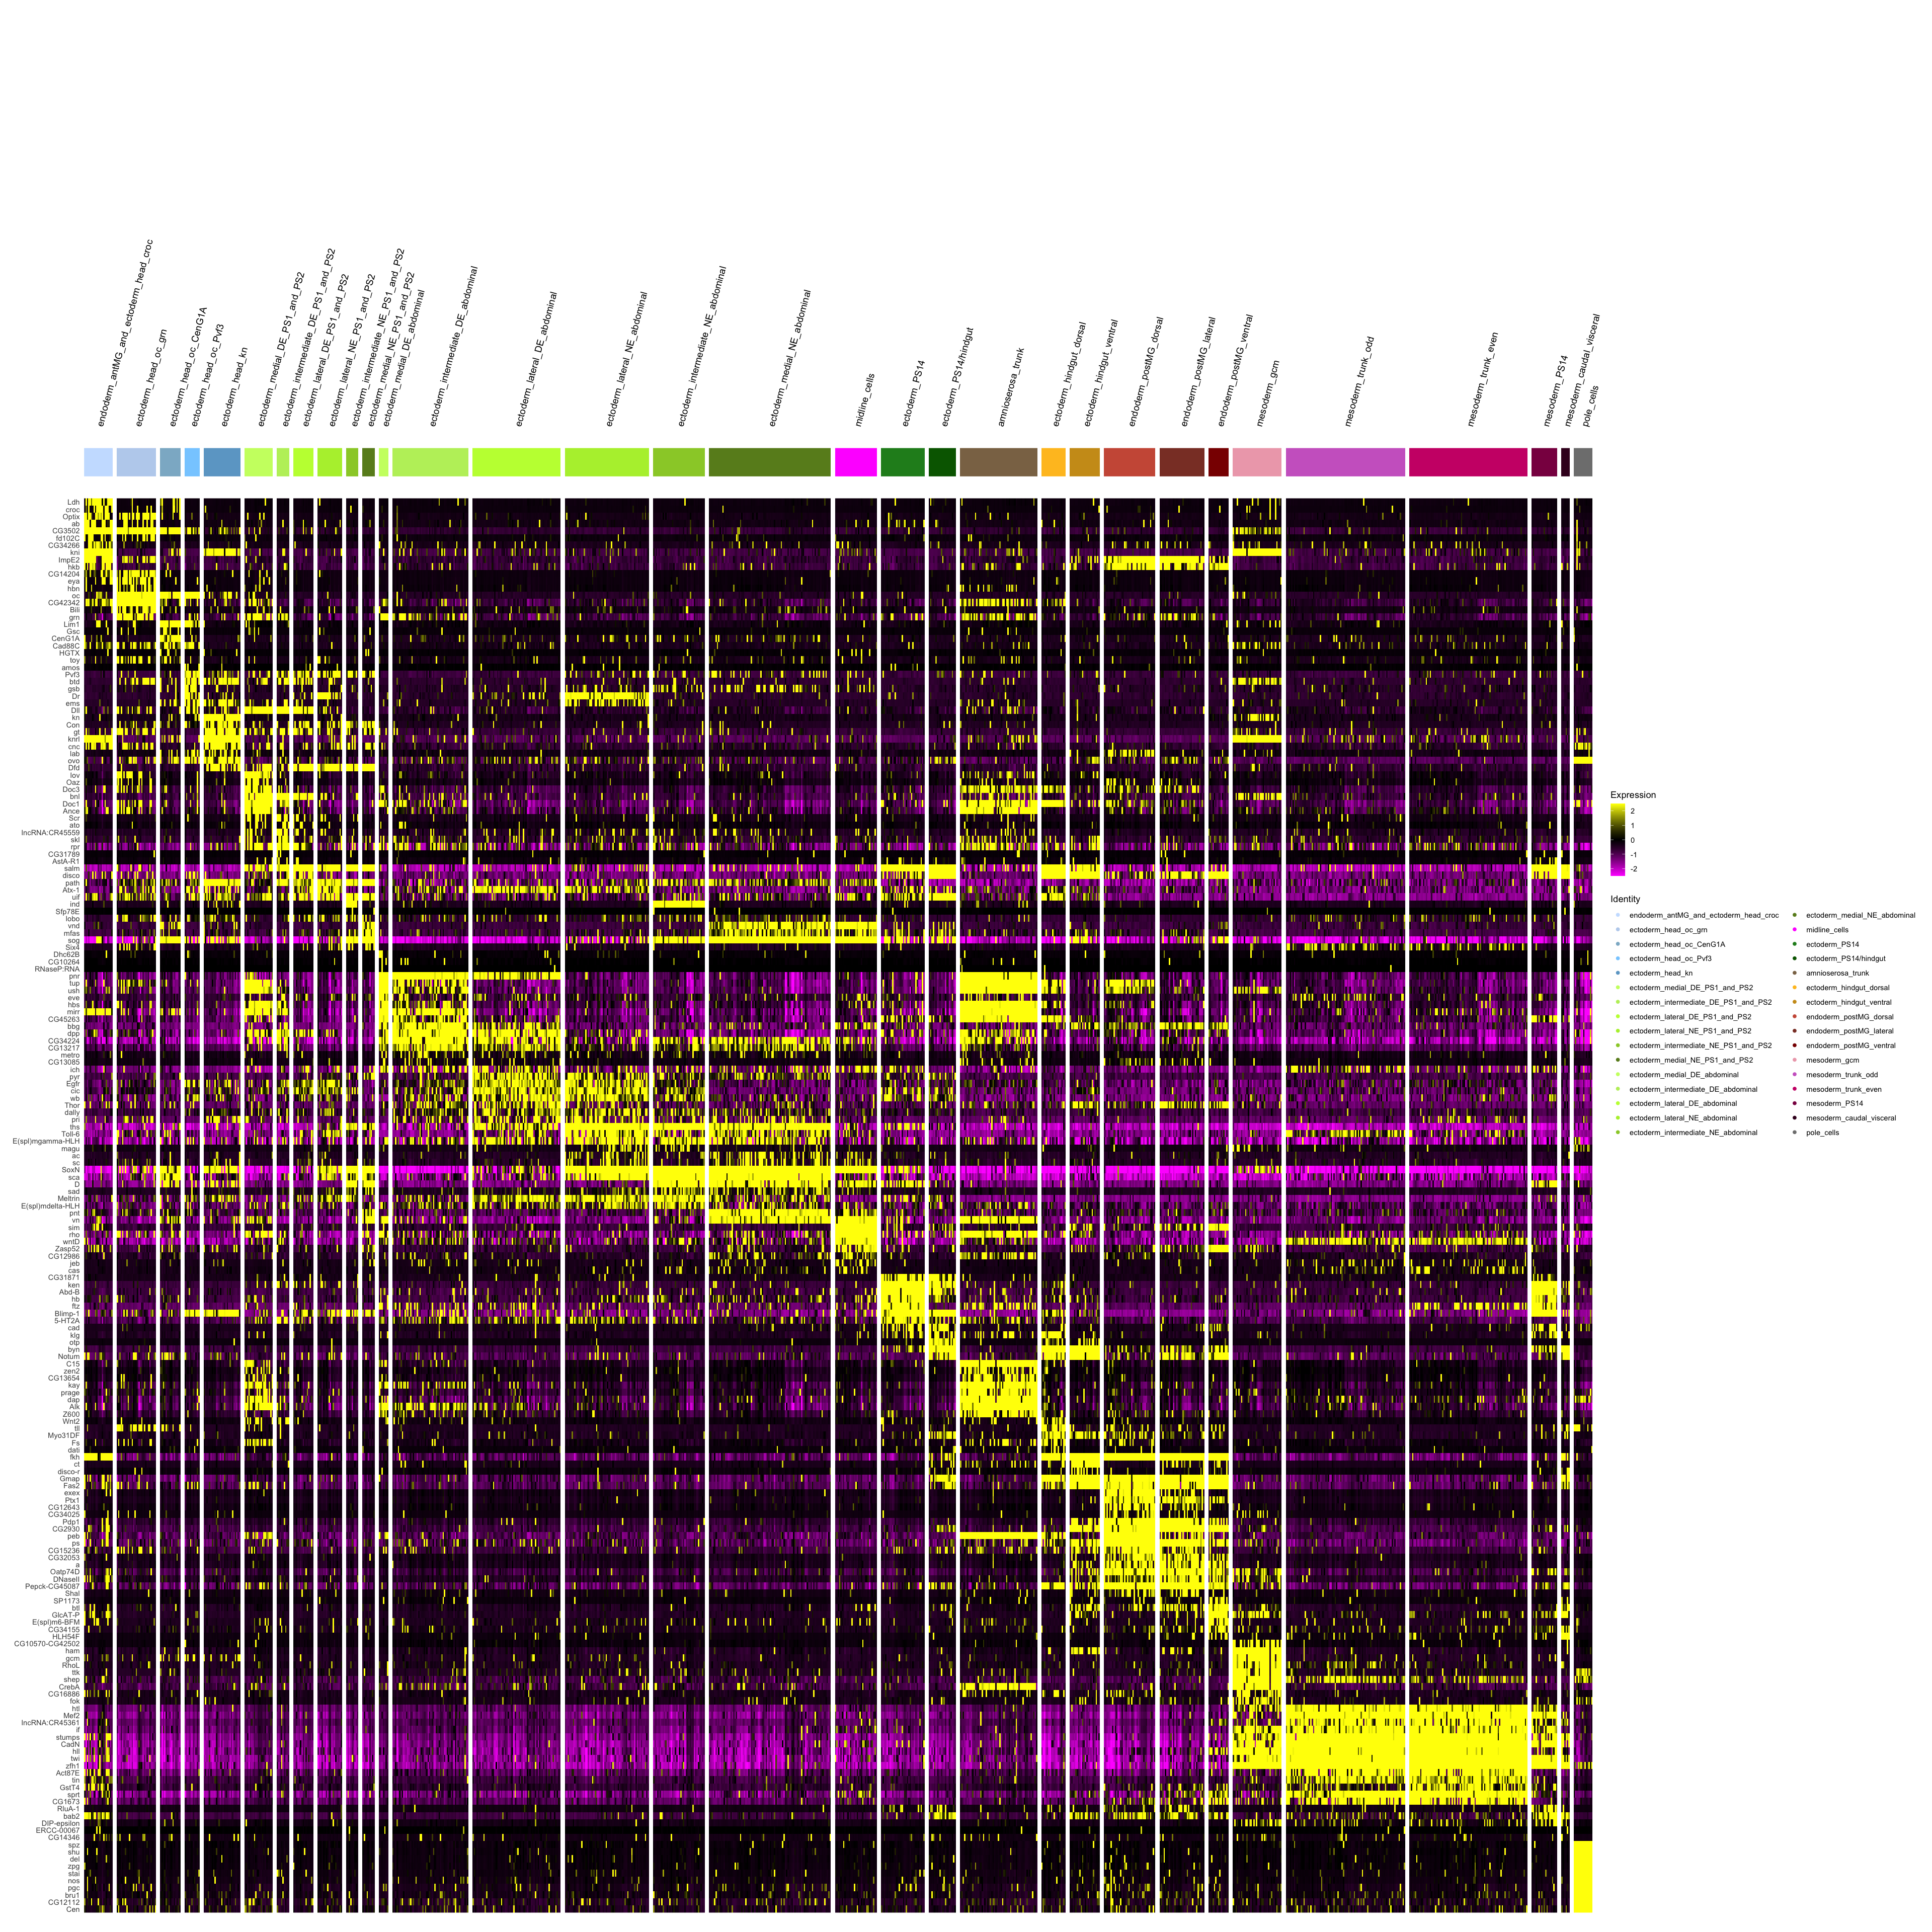

In [8]:
options(repr.plot.width=32, repr.plot.height=32)
DoHeatmap(seu_HQC, features = c(all.markers.top10$gene), group.colors = colors,
          angle = 75, size=4)
ggsave(file = "./figures/09_FindAllMarkers_Set1/All_cells_heatmap_manual_ID_with_legend_Set1.eps", width = 32, height = 32) +
theme(plot.margin = unit(c(1,1,1,1), "cm"))

In [9]:
manual_ID <- all.markers$cluster
unique.manual_ID <- annot_df$cluster_name
manual_ID_num <- copy(manual_ID)
i <- 1
for (name in unique.manual_ID){
    rname <- paste('^',name, sep = '')
    rname <- paste(rname, '$', sep = '')
    manual_ID_num <- gsub(manual_ID_num, pattern = rname, replacement = i)
    i <- i + 1
}
all.markers$cluster_num <- manual_ID_num

In [10]:
write.csv(x = all.markers, file = './all_markers_Set1.csv')

In [11]:
sessionInfo()

R version 4.0.3 (2020-10-10)
Platform: x86_64-apple-darwin17.0 (64-bit)
Running under: macOS Catalina 10.15.7

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRblas.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRlapack.dylib

locale:
[1] ja_JP.UTF-8/ja_JP.UTF-8/ja_JP.UTF-8/C/ja_JP.UTF-8/ja_JP.UTF-8

attached base packages:
[1] parallel  stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] MAST_1.16.0                 SingleCellExperiment_1.12.0
 [3] SummarizedExperiment_1.20.0 Biobase_2.50.0             
 [5] GenomicRanges_1.42.0        GenomeInfoDb_1.26.2        
 [7] IRanges_2.24.1              S4Vectors_0.28.1           
 [9] BiocGenerics_0.36.0         MatrixGenerics_1.2.0       
[11] matrixStats_0.57.0          tibble_3.0.5               
[13] dplyr_1.0.3                 Matrix_1.3-2               
[15] data.table_1.13.6           magrittr_2.0.1